# 분류  
## 분류의 개요  
* 분류  
1) 지도학습의 대표적인 유형  
2) 학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터값이 주어졌을 때 미지의 레이블 값을 예측하는 것.  
3) 종류 : 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소 근접 알고리즘, 신경망, 앙상블.  

* 앙상블  
1) 서로 다른, 또는 같은 알고리즘을 단순히 결합한 형태.  
2) 일반적으로 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉨.  
3) 배깅의 대표적인 방식인 랜덤 포레스트는 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용.  
4) 근래에는 앙상블 방식이 부스팅 방식으로 지속해서 발전하는 중.  
5) 그래디언스 부스팅 : 부스팅 방식, 뛰어난 예측 성능을 가지지만 수행 시간이 너무 오래 걸림.  
6) XgBoost, LightGBM : 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시킴, 수행 시간을 단축.  
7) 앙상블은 서로 다른/또는 같은 알고리즘을 결합한다고 했는데 대부분 동일한 알고리즘을 결합함. 일반적으로 사용하는 기본 알고리즘은 결정 트리임.  
8) 앙상블은 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 에측 성능을 향상시킴.  

* 결정 트리  
1) 매우 쉽고 유연하게 적용될 수 있는 알고리즘.  
2) 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 매우 적음.  
3) 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져 이로 인해 과적합이 발생해 예측 성능이 저하될 수도 있음.  
4) 결정 트리는 좋은 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)가 됨.  

## 결정 트리  
* 결정 트리는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘.  
* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것.  
* 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음.  
* 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요함.  
* 정보의 균일도를 측정하는 대표적인 방법 : 엔트로피를 이용한 정보 이득 지수, 지니 계수.
* 정보 이득  
1) 엔트로피 개념을 기반으로 함.  
2) 엔트로피란 주어진 데이터 집합의 혼잡도를 말함.  
3) 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음.  

* 지니 계수  
1) 0이 가장 평등하고 1로 갈수록 불평등.  
2) 지니 계수가 낮을수록 데이터 균일도가 높음.  

* 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용함.  

### 결정 트리 모델의 특징  
* 장점  
1) 균일도만 신경 쓰면 되므로 알고리즘이 쉽고 직관적임.  
2) 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음.  

* 단점  
1) 과적합으로 정확도가 떨어짐.  
2) 따라서 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 좋음.  

### 결정 트리 모델의 시각화  
* Graphviz 패키지 사용
* Graphviz : 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지.  

In [14]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

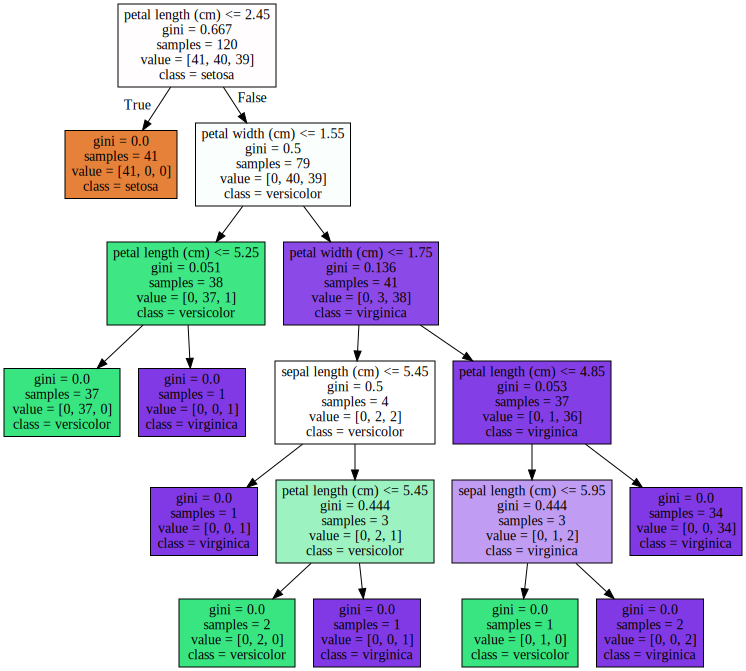

In [29]:
# 붓꽃 데이터 세트에 결정 트리 적용
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
# 파라미터 순서대로 학습이 완료된 estimator, output 파일명, 결정 클래스의 명칭, 피처의 명칭, 지니 계수 표시 여부, 
# 레이블 값, 지니계수에 따라 박스 안 색을 칠하는지 여부
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* 리프 노드는 최종 클래스(레이블) 갑싱 결정되는 노드.  
* 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨.  
* 자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음.  
* 노드 내에 기술된 지표의 의미  
1) petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드.  
2) gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
3) samples는 현 규칙에 해당하는 데이터 건수.  
4) value = []는 클래스 값 기반의 데이터 건수. Value = [41, 40, 39]이면 클래스 0값(Setosa)은 41개, 1값(Vesicolor)은 40개, 2값(Virginica)는 39개로 데이터가 구성되어 있다는 의미.

* 각 노드의 색깔은 붓꽃 데이터의 레이블값을 의미하고 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미임.  

<br>

[결정 트리의 파라미터 중 overfittig에 영향을 미치는 파라미터] 

1) max_depth 파라미터  
* 결정 트리의 최대 트리 깊이 제어.  
* 디폴트값은 None(모든 리프노드의 지니 계수가 0이 될 때까지 노드를 만듦.)  
* max_depth가 커질수록 노드의 개수가 줄어들어 트리가 간결해짐.  

2) min_samples_split 파라미터  
- 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수.  
- min_samples_split = 4이면 샘플의 개수가 4 이하이면 더이상 자식 노드를 생성하지 못한다는 의미.  
- min_samples_spllit 값이 커질수록 노드의 개수가 줄어들고 트리가 간결해짐.  

3) min_samples_leaf 파라미터  
- 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값.  
- 디폴트값은 1.  
- min_samples_leaf = 4이면 샘플 개수가 4 이하면 지니 계수가 커도 리프 노드가 됨.  
- min_samples_leaf 값을 키우면 더 이상 분할하지 않고 리프 노드가 될 수 있는 조건이 완화됨.  

<br>

[feature_importances 속성]  
* 결정 트리는 균일도에 기반해 중요한 몇 개의 피처가 명확한 규칙 트리를 만든느데 크게 기여함. -> 모델은 더 간결하고 이상치에 강한 모델을 만들 수 있기 때문.  
* 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공함.  
* ndarray 형태로 값을 반환.  
* 값이 높을수록 해당 피처의 중요도가 높다는 의미.

Feature importance : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


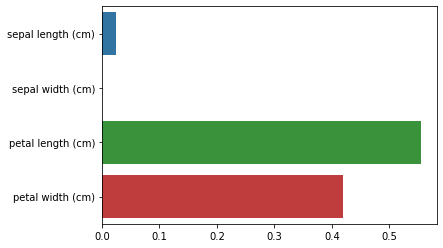

In [33]:
# dt_clf의 feature_importances_ 속성
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importance : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)  
make_classification() 함수  
* 사이킷런에서 분류를 위한 테스트용 데이터를 쉽게 만들 수 있는 함수.  
* 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트

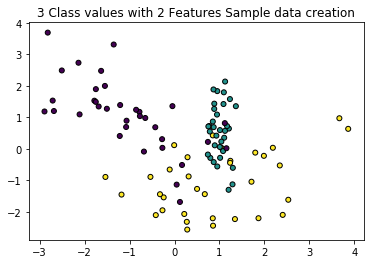

In [34]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
# n_redundant : 독립변수 중 다른 독립변수의 선형 조합으로 나타내는 성분의 수
# n_informative : 독립변수 중 종속변수와 상관관계가 있는 성분의 수
# n_cluster_per_class : 클래스 당 클러스터의 수
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [36]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

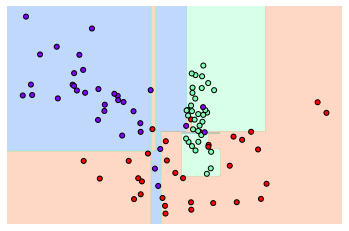

In [37]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

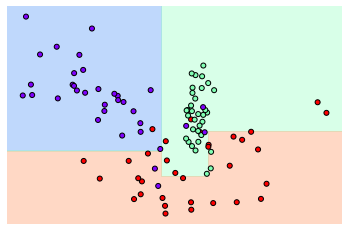

In [38]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트  
해당 데이터는 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터임.  
피처는 모두 561개가 있고 공백으로 분리돼 있음.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print("전체 피처명에서 10개만 추출:", feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
# 중복된 피처명 확인하기
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [29]:
# 중복된 피처명이 42개 존재. 중복된 피처명에 대해 원본 피처명에 _1, _2를 추가로 부여해 시로운 피처명을 가지는 함수 생성
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1])
                                                                                               if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [30]:
import pandas as pd

def get_human_dataset():
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', header=None, names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', header=None, names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [5]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [6]:
# 레이블 값은 1~6의 6개 값이고 비교적 고르게 분포
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [7]:
# DecisionTreeClassifier를 이용해 동작 예측 분류 수행하기. 하이퍼 파라미터는 모두 디폴트 값으로 설정
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터 : \n", dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [10]:
# GridSearch를 이용해 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향 살펴보기
# verbose 크기가 커질수록 진행상황을 더 자세하게 알려주는 거 같음.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.5min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8526
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8}


In [13]:
# GridSearch 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850925
1,8,0.852557
2,10,0.850925
3,12,0.844124
4,16,0.852149
5,20,0.851605
6,24,0.850245


In [15]:
# 별도의 테스트 데이터 세트에서 max_depth의 변화에 따른 값 측정하기
max_depths = [6, 8, 10, 12, 16, 20, 24]
# max_depth값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("max_depth = {0} 정확도 : {1:.4f}".format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 함.

In [16]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝하기
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8550
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [18]:
# grid_cv의 최적 하이퍼 파라미터(max_depth:8, min_samples_split:16)를 이용해 테스트 데이터 세트 예측하기
# best_estimator_ : 최적 하이퍼 파라미터로 학습이 완료된 Estimator 객체
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))

결정 트리 예측 정확도 : 0.8717


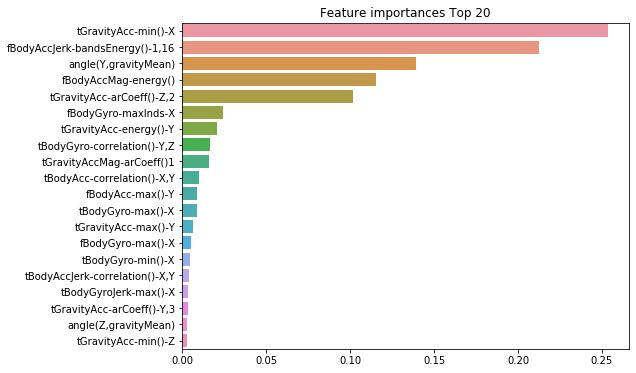

In [19]:
# 결정 트리에서 각 피처의 중요도 알아보기 : feature_importances_ 속성 이용
# 중요도가 높은 순서대로 Top20 피처를 막대그래프로 표현
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 앙상블 학습  
### 앙상블 학습 개요  
* 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법.  
* 앙상블 학습의 목표 : 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것.  
* 대부분의 정형 데이터 분류 시 앙상블이 뛰어난 성능을 나타냄.  
* ex : 랜덥 포레스트, 그래디언트 부스팅, XGBoost, LightGBM, 스태킹.  
### 앙상블 학습의 유형  
* 보팅, 배깅, 부스팅이 대표적이고, 이외에 스태킹과 같은 다양한 앙상블 방법이 있음.  
* 보팅과 배깅  
    1) 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.  
    2) 보팅(Voting)  
    <img src = "http://www.dinnopartners.com/wp-content/uploads/2020/01/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7-2020-01-31-09.23.17.png">  
        * 서로 다른 알고리즘을 가진 분류기를 결합.
        * 분류기들은 같은 데이터 세트를 학습.  
    3) 배깅(Bagging)  
    <img src = "http://www.dinnopartners.com/wp-content/uploads/2020/01/%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7-2020-01-31-09.26.43.png">  
        * 분류기가 모두 같은 알고리즘. 분류기마다 데이터 샘플링이 다름.  
        * 개별 Classifier(분류기)에게 데이터를 샘플링해서 추출하는 방식을 부트스트래핑(Bootstraping) 분할 방식이라 함.  
        * 부트스트래핑 분할 방식은 만약에 10000개의 데이터가 있고, 10개의 분류기가 존재한다면 10000개를 중복을 허용하여 10000개의 데이터를 추출하여(복원추출) 1개의 데이터셋을 만드는 과정을 총 10번 진행하여 10개의 데이터셋을 만들어냄.  
        * 대표적인 배깅 방식은 랜덤 포레스트임.  

* 부스팅(Boosting)  
    1) 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 다음 분류기에게 가중치(weight)를 부여하여 학습과 예측을 진행함.  
    2) 예측 성능이 뛰어나 앙상블 학습 중에서 많이 사용됨.  
    3) XGBoost, LightGBM  

* 스태킹(Stacking)  
    1) 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방식.  
    
### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)  
* 하드 보팅 : 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정함.  
* 소프트 보팅 : 분류기들의 레이블값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확류링 가장 높은 레이블값을 최종 보팅 결괏값으로 선정함.  
* 일반적으로 소프트 보팅이 보팅 방법으로 적용됨.  
(위 그림 : 하드보팅, 아래 그림 : 소프트보팅)
<img src = "http://itwiki.kr/images/3/3f/%ED%95%98%EB%93%9C_%EB%B3%B4%ED%8C%85.png"> <img src = "http://itwiki.kr/images/8/8a/%EC%86%8C%ED%94%84%ED%8A%B8_%EB%B3%B4%ED%8C%85.png">  

### 보팅 분류기  

In [21]:
# 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석해 보기.
# 위스콘신 유방암 데이터 세트 : 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [28]:
# 로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기 만들어 보기
# 사이킷런에서는 VotingClassifier 클래스를 이용해 보팅 분류기를 생성.
# VotingClassifier 주요 생성 인자 : estimators, voting
# estimators : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음.
# voting : 'hard'는 하드 보팅 방식, 'soft'는 소프트 보팅 방식을 적용한다는 의미.(디폴트는 hard)

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 랜덤 포레스트  
### 랜덤 포레스트의 개요 및 실습  
* 배깅의 대표적인 알고리즘  
* 앙상블 알고리즘 중 비교적 빠른 수행 속도&다양한 영역에서 높은 예측 성능.  
* 랜덤 포레스트의 기반 알고리즘 : 결정 트리  
* 여러 개의 결정 트리 분류기(같은 알고리즘)가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해(부트 스트래핑) 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅(소프트 보팅)을 통해 예측 결정.  

In [33]:
# 사용자 행동 인식 데이터 세트를 랜덤 포레스트를 이용하여 예측해보기
# 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원함.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환.
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {0:.4f}".format(accuracy))

랜덤 포레스트 정확도 : 0.9108


### 랜덤 포레스트 하이퍼 파라미터 튜닝  
* 트리 기반의 앙상블 알고리즘 단점  
    1) 하이퍼 파라미터가 너무 많아 튜닝을 위한 시간이 많이 소모됨.  
    2) 많은 시간을 소모했음에도 튜닝 후 에측 성능이 크게 향상되는 경우가 많지 않음.  
* 랜덤 포레스트에서 사용되는 파라미터  
    1) n_estimator  
        * 결정 트리의 개수 지정.  
        * 디폴트는 10.  
        * 값이 클수록 좋은 성능이지만 계속 증가시킨다고 성능이 무조건 향상되진 않음. 값이 증가할수록 학습 수행 시간이 길어짐.  
    2) max_feature  
        * 결정 트리에 사용된 max_features 파라미터와 같음.  
        * 결정 트리에서 디폴트는 None이지만 랜덤 포레스트에서는 auto 즉, sqrt임.  
        * 따라서 전체 피처가 16개이면 랜덤 포레스트의 트리를 분할하는 피처를 참조하는 max_feature의 기본값은 4임.  
    3) max_depth와 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용된 파라미터가 랜덤 포레스트에서도 똑같이 사용됨.  

In [35]:
# GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝하기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchcV 수행
# n_jobs = -1 : 모든 CPU 코어를 이용해 학습
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터 : \n", grid_cv.best_params_)
print("최고 예측 정확도 : {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9166


In [37]:
# n_estimator를 300으로 하고 최적 하이퍼 파라미터를 사용하여 test 데이터셋 예측하기
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9165


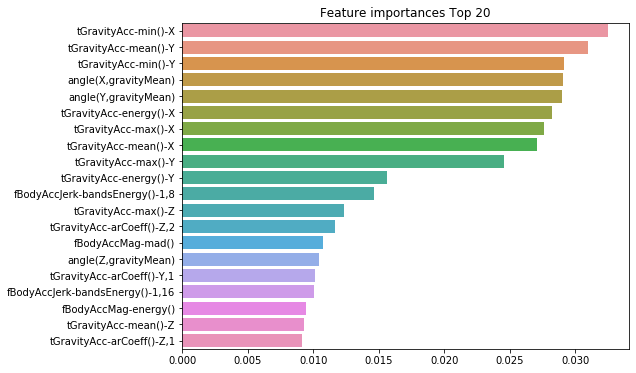

In [39]:
# rf_clf1의 피처 중요도 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)  
### GBM의 개요 및 실습  
* 부스팅의 대표적인 예로는 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있음.  
* 에이다 부스트(AdaBoost) 학습 진행 과정
<img src = "https://iq.opengenus.org/content/images/2019/12/2019-03-08-011500.jpg">  
    1) 단계별로 잘못 예측한 데이터에 대해 가중치를 부여(여기서는 가중치 부여된 데이터를 크게 표시함)  
<img src = "https://camo.githubusercontent.com/09f674d111256999bca23bf4c0c4c0eabd67fe14/68747470733a2f2f736c696465706c617965722e636f6d2f736c6964652f393039323230392f32372f696d616765732f32302f416c676f726974686d2b416461626f6f73742b2d2b4578616d706c652e6a7067">  
    2) 학습기별로 각각 가중치를 부여해 결합합.(예 : 첫번째 학습기에는 가중치 0.3, 두번째 학습기에는 가중치 0.5, 세번째 학습기에는 가중치 0.8을 부여한 후 모두 결합해 예측 수행.  
* GBM(Gradient Boost Machine)  
    1) 에이다 부스트와 유사하지만 가중치 업데이트를 경사 하강법을 이용함.  
* 경사 하강법  
    1) 오류값 = 실제값 - 예측값  
    2) 분류의 실제 결괏값을 y, 피처를 x1, x2, ..., xn, 피처에 기반한 예측함수를 F(x)라 하면 오류식 h(x) = y - F(x).  
    3) 오류식 h(x)를 최소화하는 방향성을 가지고 반복적으로 가중치값을 업데이트하는 것이 경사 하강법임.

In [40]:
# GBM을 이용해 사용자 행동 데이터 세트 예측하기.
# 사이킷런은 GBM을 이용할 수 있는 GradientBoostingClassifier 클래스를 제공함.

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시각 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("GBM 정확도 : {0:.4f}".format(gb_accuracy))
print("GBM 수행 시간 : {0:.1f} 초".format(time.time() - start_time))

GBM 정확도 : 0.9386
GBM 수행 시간 : 195.7 초


* 일반적으로 GBM이 랜덤 포레스트에 비해 에측 성능이 조금 더 뛰어난 경우가 많음.  
* 하지만 랜덤포레스트에 비해 GBM은 수행시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력이 더 필요함. 특히 수행 시간은 극복해야할 중요한 과제.  
### GBM 하이퍼 파라미터 및 튜닝  
* loss  
    1) 경사 하강법에서 사용할 비용 함수 지정.  
    2) 기본값 : 'deviance'  
    3) 특별한 이유가 없으면 기본값 적용.  
* lerning_rate  
    1) GBM이 학습을 진행할 때 Weak learner가 순차적으로 오류값을 보정해 나가는데 적용하는 계수.  
    2) 0~1 사이의 값을 지정할 수 있으며 기본값을 0.1.  
    3) 값이 작을수록 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높음.  
    4) 너무 작은 값이면 순차적인 반복이 필요해 수행 시간이 오래 걸리고, 반복이 완료돼도 최소 오류 값을 찾지 못할 수 있음.  
    5) 너무 큰 값을 적용하면 최소 오류 값을 찾지 못하고 지나쳐 버려 예측 성능이 떨어질 가능성이 높지만 빠른 수행이 가능함.  
    6) learning_rate는 n_estimators와 상호 보완적으로 조합해 사용.  
* n_estimators  
    1) weak learner의 개수.  
    2) 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있지만 수행 시간이 오래 걸림.  
    3) 기본값은 10.  
* subsample  
    1) weak learner가 학습에 사용하는 데이터의 샘플링 비율.  
    2) 기본값은 1 -> 전체 학습 데이터를 기반으로 학습한다는 의미.  
    3) 과적합이 염려된다면 1보다 작은 값으로 설정.

In [41]:
# GridSearchCV를 이용해 GBM 하이퍼 파라미터 튜닝하기  
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print("최적 하이퍼 파라미터 : \n", grid_cv.best_params_)
print("최고 예측 정확도 : {0:.4f}".format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 16.8min finished


최적 하이퍼 파라미터 : 
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도 : 0.9014


In [42]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("GBM 정확도 : {0:.4f}".format(gb_accuracy))

GBM 정확도 : 0.9396


GBM의 장점과 단점  
* 장점 : 과적합에도 강한 뛰어난 예측 성능.  
* 단점 : 수행 시간이 오래 걸림.  

<br>
GBM을 기반으로 새롭게 만들어진 알고리즘 중 가장 각광받는 알고리즘 : XGBoost, LightGBM.  

## XGBoost(eXtra Gradient Boost)  
### XGBoost 개요  
* XGBoost는 GBM에 기반한 알고리즘.  
* GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결해 매우 각광을 받고 있음.  
* XGBoost의 주요 장점  
    1) 뛰어난 예측 성능  
    2) GBM 대비 빠른 수행 시간  
    3) 과적합 규제(Regularization)  
    4) Tree pruning(나무 가지치기) : XGBoost도 max_depth 파라미터로 분할 깊이를 조정하지만 tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기 해 분할 수를 더 줄이는 추가적인 장점을 가지고 있음.  
    5) 자체 내장된 교차 검증 : 지정된 반복 횟수가 아니라 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화 되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있음.  
    6) 결손값 자체 처리

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier

### 파이썬 래퍼 XGBoost 하이퍼 파라미터  
* 파라미터가 많으므로 이는 생략. 책 참고.  
* 과적합 문제가 심각할 경우 파라미터 조정  
    1) eta(GBM의 learning rate와 같은 파라미터)값 낮추기(0.01~0.1). eta값을 낮출 경우 num_round(or n_estimator)는 높여줘야 함.  
    2) max_depth값 낮춤.  
    3) min_child_weight값 높임.  
    4) gamma값 높임.  
    5) subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있음.  
* XGBoost는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있음.  
* XGBoost, LightGBM 모두 조기 중단 기능이 있어 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선할 수 있음.  
    ex) n_estimator = 200, 조기 중단 파라미터값 = 50일 때, 100회에서 학습 오류 값이 0.8이고 101~150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅 종료함.  
    
### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측  

In [45]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [46]:
# 레이블값 분포 확인하기
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [48]:
# 전체 데이터 세트 중 80%를 학습용으로, 20%를 테스트용으로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [49]:
# 파이썬 래퍼 XGBoost는 사이킷런과 달리 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성함.
# DMatrix는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트임.
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [50]:
# 파이썬 래퍼 XGBoost의 하이퍼 파라미터 설정
params = { 'max_depth' : 3,     # max_depth(트리 최대 깊이)는 3
           'eta' : 0.1,     # 학습률 eta는 0.1
           'objective' : 'binary:logistic',     # 예제 데이터가 0 또는 1인 이진 분류이므로, 목적함수는 이진 로지스틱.
           'eval_metric' : 'logloss',     # 오류 함수의 평가 지표는 logloss.
           'early_stoppings' : 100 
         }
num_rounds = 400    # 부스팅 반복 횟수는 400회.

조기 중단은 xgboost의 train() 함수에 early_stopping_rounds 파라미터를 입력하여 설정함.  
early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 eval_set과 eval_metric이 함께 설정돼야 함.  
    * eval_set : 성능 평가를 수행할 평가용 데이터 세트를 설정.  
    * eval_metric : 평가 세트에 적용할 성능 평가 방법. 분류일 경우 주로 'error', 'logloss'를 적용.

In [51]:
# train 데이터 세트는 'train', evaluation(tet) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달.
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

[161]	train-logloss:0.007261	eval-logloss:0.088013
[162]	train-logloss:0.007241	eval-logloss:0.087758
[163]	train-logloss:0.007221	eval-logloss:0.087784
[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-log

In [53]:
# 테스트 데이터 세트 예측하기
pred_probs = xgb_model.predict(dtest)
# 사이킷런과 달리 predict() 메서드값을 예측 결과 클래스값(0, 1)을 반환하지 않고 예측 결과를 추정할 수 있는 확률 값을 반환함.
print("predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨.")
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시 : ", preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨.
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차 행렬")
    print(confusion)
    # ROC-AUC print 추가
    print("정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}".
          format(accuracy, precision, recall, f1, roc_auc))

In [59]:
# get_clf_eval() 함수를 적용해 XGBoost 모델의 예측 성능 평가하기
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870, F1 : 0.9806, AUC : 0.9951


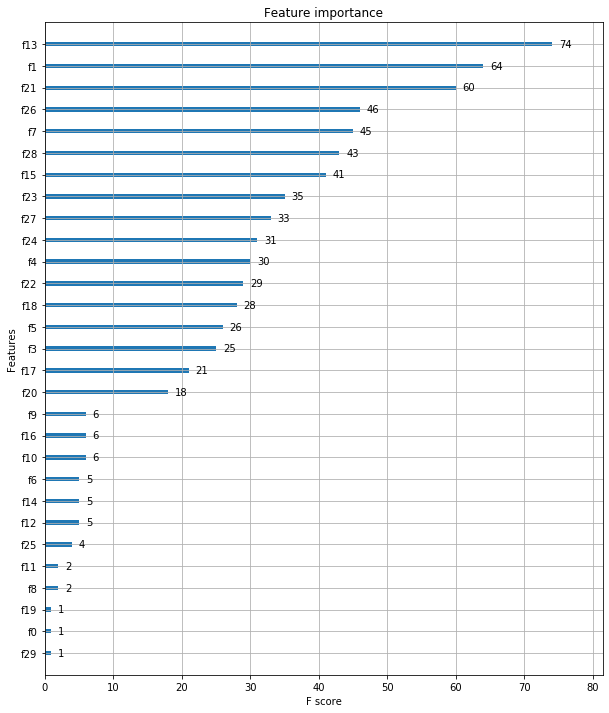

In [61]:
# xgboost 패키지에 내장된 시각화 기능 수행하기
# plot_importance() : 피처의 중요도를 막대그래프 형식으로 나타냄. 기본 평가 지표로 f1 스코어 사용.
# f0은 첫번째 피처, f1은 두번재 피처를 의미.
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### 사이킷런 래퍼 XGBoost의 개요 및 적용  
* 사이킷런에서는 분류를 위한 래퍼 클래스로 XGGClassifier, 회귀를 위한 래퍼 클래스로 XGBRegressor를 제공.  
* 파이썬 래퍼 XGBoost와는 달리 사이킷런 래퍼 XGBoost는 fit(), predict()만으로 학습, 예측이 가능하고, GridSearchCV, Pipeline 등 사이킷런의 다른 유틸리티를 그대로 사용할 수 있음. 

In [64]:
# 사이킷런의 XGBClassifier를 이용하여 위스콘신 대학병원의 유방암 데이터 세트 예측하기
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [65]:
# get_clf_eval를 이용해 성능 평가
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870, F1 : 0.9806, AUC : 0.9951


사이킷런 래퍼 XGBoost에서도 조기 중단을 수행할 수 있음.  
조기 중단 관련 파라미터를 fit()에 입력하면 됨.  
[조기 중단 관련 파라미터]  
    * early_stopping_rounds : 평가 지표가 향상될 수 있는 반복 횟수 정의  
    * eval_metric : 조기 중단을 위한 평가 지표  
    * eval_set : 성능 평가를 수행할 데이터 세트

In [66]:
# fit()에 조기 중단 관련 파라미터를 입력 후 학습
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
# 다음 예제에서 평가를 위한 데이터 세트로 테스트 데이터 세트를 사용했음. 하지만 이는 바람직하지 않음.
# 테스트 데이터 세트는 학습 시 완전히 알려지지 않은 데이터 세트를 사용해야 함.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [67]:
# 예측 성능 평가하기
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율 : 0.9870, F1 : 0.9744, AUC : 0.9954


In [69]:
# 조기 중단값을 너무 급격하게 줄였을 경우 - early_stopping_rounds = 10일 때
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


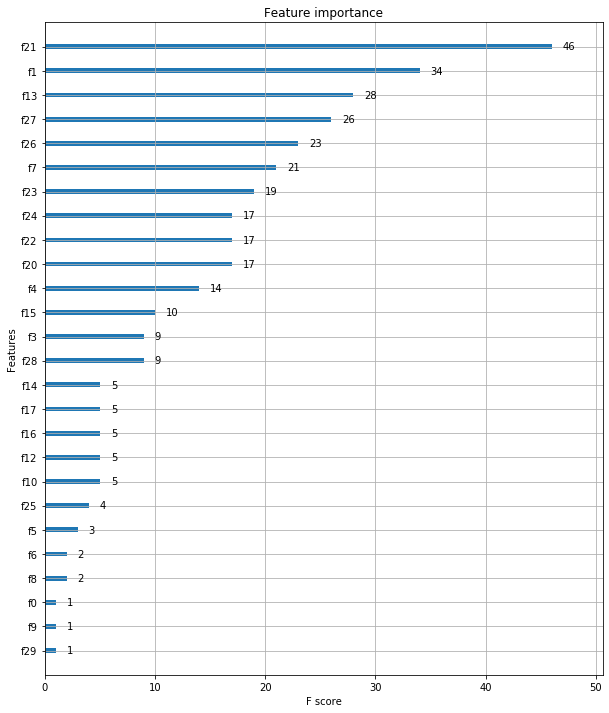

In [71]:
# 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

## LightGBM  
* LightGBM의 장점  
    1) 더 빠른 학습과 예측 수행 시간.  
    2) 더 적은 메모리 용량.  
    3) 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변화하고 이에 따른 노드 분할 수행.)  
* 단점  
    1) 적은 데이터 세트(공식 문서에서는 10,000건 이하의 데이터 세트)에 적용할 경우 과적합이 발생하기 쉬움.  
* LightGBM은 리프 중심 분할 방식을 사용함.  
* 리프 중심 분할 방식  
    1) 기존의 대부분 트리 기반 알고리즘 : 균형 트리 분할(Level Wise) 방식.  
    2) 맆 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨.  
    3) 학습을 반복할수록 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있음.  
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F998B193D5E2E52561B">
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F998B433D5E2E52561B">  

### LightGBM 하이퍼 파라미터  
LightGBM은 Xgboost와 달리 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요함.(예를 들어 max_depth를 매우 크게 가짐.)  
나머지 주요 파라미터들이 굉장히 많으므로 책 참고.  

### 하이퍼 파라미터 튜닝 방안  
num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안.  
    * num_leaves : 개별 트리가 가질 수 있는 최대 리프의 수. LightGBM의 복잡도를 제어하는 주요 파라미터. num_leaves가 커지면 정확도는 높아지지만, 트리의 깊이가 깊어지고 모델 복잡도가 커져 과적합 확률이 커짐.  
    * min_data_in_leaf : 사이킷런에서는 min_child_samples. 과적합을 개선하기 위한 중요한 파라미터. 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지함.  
    * max_depth : 깊이의 크기를 제한. 과적합을 개선하는데 사용.  
    
### LightGBM 적용 - 위스콘신 유방암 예측(사이킷런)  

In [73]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.  
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [74]:
# 학습 모델 성능 평가
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도 : 0.9474, 정밀도 : 0.9494, 재현율 : 0.9740, F1 : 0.9615, AUC : 0.9926


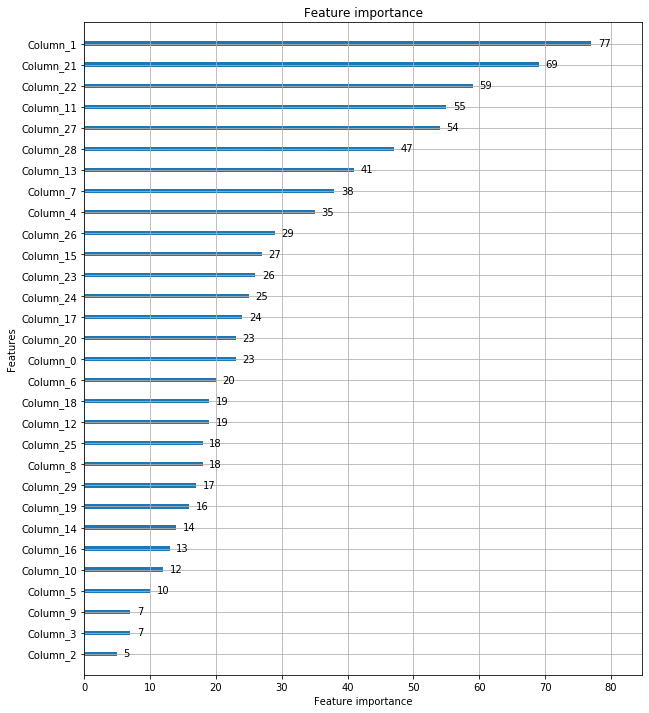

In [75]:
# plot_importance()를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## 분류 실습 - 캐글 산탄데르 고객 만족 예측  
* 고객 만족 여부를 XGBoost와 LightGBM을 활용해 예측해 보기.  
* 이 데이터는 370개의 피처가 있고, 피처 이름이 모두 익명 처리돼 이름만을 가지고 어떤 속성인지는 추정할 수 없음.  
* 클래스 레이블 명은 TARGET이며, 1이면 불만 고객,0이면 만족한 고객  
* 모델의 성능 평가는 ROC-AUC로 평가.  

### 데이터 전처리

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("train_santander.csv", encoding='latin-1')
print("dataset shape:", cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [84]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


* 111개의 피처가 float형, 260개의 피처가 int형임.  
* Null값 없음.  

In [85]:
# Target 속성값 분포 알아보기
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print("unsatisfied 비율은 {0:.2f}".format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


대부분이 만족이며, 불만족인 고객은 4%밖에 되지 않음.

In [86]:
# 각 피처의 분포도 확인하기
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


var3 칼럼의 경우 min값이 -999999임. -> NaN이나 특정 예외 값을 -999999로 변환했을 것.  
var3값을 조사해보면 -999999값이 116개나 있음.  
var3는 숫자형이고, 다른값에 비해 편차가 너무 심하므로 -999999를 가장 값이 많은 2로 변환.  
ID 피처는 단순 식별자이므로 피처 삭제.

In [87]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print("피처 데이터 shape:{0}".format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [88]:
# 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트를 분리.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print("학습 세트 Shape : {0}, 테스트 세트 Shape : {1}".format(X_train.shape, X_test.shape))

print("학습 세트 레이블값 분포 비율")
print(y_train.value_counts() / train_cnt)
print("\n 테스트 세트 레이블값 분포 비율")
print(y_test.value_counts() / test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


학습과 테스트 데이터 세트 모두 TARGET의 값의 분포가 원본 데이터와 유사하게 전체 데이터의 4% 정도로 불만족값으로 만들어짐.  
### XGBoost 모델 학습과 하이퍼 파라미터 튜닝  

In [91]:
# XGBoost의 학습 모델을 생성하고 예측 결과를 ROC AUC로 평가해 보기.
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [92]:
# XGBoost의 하이퍼 파라미터 튜닝 수행
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소.
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth' : [5, 7], 
          'min_child_weight' : [1, 3],    # 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합. 클수록 분할 자제. 과적합을 조절하기 위해 사용.
          'colsample_bytree' : [0.5, 0.75]    # GBM의 max_features와 유사.
         }

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
print("GridSearchCV 최적 파라미터 : ", gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802656	validation_1-auc:0.807919
[2]	validation_0-auc:0.80013	validation_1-auc:0.804948
[3]	validation_0-auc:0.805843	validation_1-auc:0.809844
[4]	validation_0-auc:0.814728	validation_1-auc:0.817554
[5]	validation_0-auc:0.80989	validation_1-auc:0.812919
[6]	validation_0-auc:0.80994	validation_1-auc:0.813688
[7]	validation_0-auc:0.818246	validation_1-auc:0.820487
[8]	validation_0-auc:0.821681	validation_1-auc:0.823214
[9]	validation_0-auc:0.819933	validation_1-auc:0.821108
[10]	validation_0-auc:0.825898	validation_1-auc:0.825134
[11]	validation_0-auc:0.829776	validation_1-auc:0.827521
[12]	validation_0-auc:0.832087	validation_1-auc:0.828878
[13]	validation_0-auc:0.83185	validation_1-auc:0.827989
[14]	validation_0-auc:0.830253	validation_1-auc:0.826429
[1

[50]	validation_0-auc:0.86211	validation_1-auc:0.842776
[51]	validation_0-auc:0.863213	validation_1-auc:0.843216
[52]	validation_0-auc:0.863963	validation_1-auc:0.844009
[53]	validation_0-auc:0.864482	validation_1-auc:0.844648
[54]	validation_0-auc:0.865133	validation_1-auc:0.844937
[55]	validation_0-auc:0.865492	validation_1-auc:0.844709
[56]	validation_0-auc:0.865993	validation_1-auc:0.844996
[57]	validation_0-auc:0.866332	validation_1-auc:0.845129
[58]	validation_0-auc:0.866537	validation_1-auc:0.844909
[59]	validation_0-auc:0.866757	validation_1-auc:0.844844
[60]	validation_0-auc:0.867255	validation_1-auc:0.844642
[61]	validation_0-auc:0.867647	validation_1-auc:0.844413
[62]	validation_0-auc:0.86778	validation_1-auc:0.844403
[63]	validation_0-auc:0.868042	validation_1-auc:0.844125
[64]	validation_0-auc:0.868285	validation_1-auc:0.844139
[65]	validation_0-auc:0.868816	validation_1-auc:0.844317
[66]	validation_0-auc:0.868901	validation_1-auc:0.844326
[67]	validation_0-auc:0.869074	va

[12]	validation_0-auc:0.832194	validation_1-auc:0.830867
[13]	validation_0-auc:0.832881	validation_1-auc:0.830585
[14]	validation_0-auc:0.83105	validation_1-auc:0.829088
[15]	validation_0-auc:0.834064	validation_1-auc:0.830594
[16]	validation_0-auc:0.836488	validation_1-auc:0.832439
[17]	validation_0-auc:0.838566	validation_1-auc:0.834435
[18]	validation_0-auc:0.841291	validation_1-auc:0.836339
[19]	validation_0-auc:0.840159	validation_1-auc:0.835519
[20]	validation_0-auc:0.841893	validation_1-auc:0.836441
[21]	validation_0-auc:0.841405	validation_1-auc:0.836036
[22]	validation_0-auc:0.840321	validation_1-auc:0.834835
[23]	validation_0-auc:0.84251	validation_1-auc:0.837768
[24]	validation_0-auc:0.844119	validation_1-auc:0.839223
[25]	validation_0-auc:0.84386	validation_1-auc:0.83757
[26]	validation_0-auc:0.843624	validation_1-auc:0.836767
[27]	validation_0-auc:0.845274	validation_1-auc:0.838187
[28]	validation_0-auc:0.846582	validation_1-auc:0.839603
[29]	validation_0-auc:0.84632	valid

[66]	validation_0-auc:0.866101	validation_1-auc:0.844762
[67]	validation_0-auc:0.866303	validation_1-auc:0.844544
[68]	validation_0-auc:0.866493	validation_1-auc:0.844325
[69]	validation_0-auc:0.866651	validation_1-auc:0.844105
[70]	validation_0-auc:0.866761	validation_1-auc:0.84405
[71]	validation_0-auc:0.866972	validation_1-auc:0.844211
[72]	validation_0-auc:0.867151	validation_1-auc:0.844122
[73]	validation_0-auc:0.867376	validation_1-auc:0.844185
[74]	validation_0-auc:0.867442	validation_1-auc:0.844186
[75]	validation_0-auc:0.867606	validation_1-auc:0.84417
[76]	validation_0-auc:0.86786	validation_1-auc:0.844023
[77]	validation_0-auc:0.86797	validation_1-auc:0.844189
[78]	validation_0-auc:0.868345	validation_1-auc:0.844065
[79]	validation_0-auc:0.868528	validation_1-auc:0.844039
[80]	validation_0-auc:0.868618	validation_1-auc:0.844043
[81]	validation_0-auc:0.868874	validation_1-auc:0.844012
[82]	validation_0-auc:0.869039	validation_1-auc:0.84399
[83]	validation_0-auc:0.869377	valid

[16]	validation_0-auc:0.848975	validation_1-auc:0.835177
[17]	validation_0-auc:0.851268	validation_1-auc:0.836379
[18]	validation_0-auc:0.853478	validation_1-auc:0.836386
[19]	validation_0-auc:0.852335	validation_1-auc:0.835925
[20]	validation_0-auc:0.855544	validation_1-auc:0.836983
[21]	validation_0-auc:0.855553	validation_1-auc:0.836397
[22]	validation_0-auc:0.855033	validation_1-auc:0.834445
[23]	validation_0-auc:0.856963	validation_1-auc:0.836413
[24]	validation_0-auc:0.85907	validation_1-auc:0.838012
[25]	validation_0-auc:0.859496	validation_1-auc:0.836454
[26]	validation_0-auc:0.860395	validation_1-auc:0.836356
[27]	validation_0-auc:0.862315	validation_1-auc:0.837705
[28]	validation_0-auc:0.864206	validation_1-auc:0.837761
[29]	validation_0-auc:0.863938	validation_1-auc:0.837658
[30]	validation_0-auc:0.865498	validation_1-auc:0.83833
[31]	validation_0-auc:0.866862	validation_1-auc:0.839237
[32]	validation_0-auc:0.86727	validation_1-auc:0.837928
[33]	validation_0-auc:0.86829	vali

[95]	validation_0-auc:0.894718	validation_1-auc:0.841673
Stopping. Best iteration:
[65]	validation_0-auc:0.888902	validation_1-auc:0.843524

[0]	validation_0-auc:0.736837	validation_1-auc:0.734096
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822074	validation_1-auc:0.815712
[2]	validation_0-auc:0.814373	validation_1-auc:0.806888
[3]	validation_0-auc:0.828324	validation_1-auc:0.821214
[4]	validation_0-auc:0.832905	validation_1-auc:0.825577
[5]	validation_0-auc:0.82953	validation_1-auc:0.822776
[6]	validation_0-auc:0.830211	validation_1-auc:0.822255
[7]	validation_0-auc:0.833664	validation_1-auc:0.825988
[8]	validation_0-auc:0.839	validation_1-auc:0.82913
[9]	validation_0-auc:0.838751	validation_1-auc:0.828431
[10]	validation_0-auc:0.843419	validation_1-auc:0.830844
[11]	validation_0-auc:0.845813	validation_1-auc:0.833661
[12]	validation_0-auc:0.847898	va

[45]	validation_0-auc:0.870867	validation_1-auc:0.836073
[46]	validation_0-auc:0.872491	validation_1-auc:0.836406
[47]	validation_0-auc:0.873587	validation_1-auc:0.837012
[48]	validation_0-auc:0.873936	validation_1-auc:0.83661
[49]	validation_0-auc:0.874852	validation_1-auc:0.836541
[50]	validation_0-auc:0.87495	validation_1-auc:0.835912
[51]	validation_0-auc:0.875651	validation_1-auc:0.836387
[52]	validation_0-auc:0.876333	validation_1-auc:0.836816
[53]	validation_0-auc:0.876628	validation_1-auc:0.837388
[54]	validation_0-auc:0.877094	validation_1-auc:0.837832
[55]	validation_0-auc:0.877855	validation_1-auc:0.83797
[56]	validation_0-auc:0.87859	validation_1-auc:0.838514
[57]	validation_0-auc:0.878867	validation_1-auc:0.838492
[58]	validation_0-auc:0.87909	validation_1-auc:0.838433
[59]	validation_0-auc:0.879142	validation_1-auc:0.838469
[60]	validation_0-auc:0.879478	validation_1-auc:0.83843
[61]	validation_0-auc:0.879742	validation_1-auc:0.838421
Stopping. Best iteration:
[31]	valida

[21]	validation_0-auc:0.856136	validation_1-auc:0.837891
[22]	validation_0-auc:0.85573	validation_1-auc:0.837673
[23]	validation_0-auc:0.857501	validation_1-auc:0.837776
[24]	validation_0-auc:0.858376	validation_1-auc:0.83902
[25]	validation_0-auc:0.858584	validation_1-auc:0.838329
[26]	validation_0-auc:0.858925	validation_1-auc:0.837917
[27]	validation_0-auc:0.859719	validation_1-auc:0.839459
[28]	validation_0-auc:0.861408	validation_1-auc:0.839827
[29]	validation_0-auc:0.861979	validation_1-auc:0.839394
[30]	validation_0-auc:0.863815	validation_1-auc:0.840433
[31]	validation_0-auc:0.865709	validation_1-auc:0.841593
[32]	validation_0-auc:0.865927	validation_1-auc:0.839924
[33]	validation_0-auc:0.866076	validation_1-auc:0.839817
[34]	validation_0-auc:0.865947	validation_1-auc:0.839194
[35]	validation_0-auc:0.867983	validation_1-auc:0.840204
[36]	validation_0-auc:0.869748	validation_1-auc:0.840745
[37]	validation_0-auc:0.869883	validation_1-auc:0.840638
[38]	validation_0-auc:0.869663	va

[64]	validation_0-auc:0.868086	validation_1-auc:0.838147
[65]	validation_0-auc:0.868253	validation_1-auc:0.838083
[66]	validation_0-auc:0.86836	validation_1-auc:0.838071
Stopping. Best iteration:
[36]	validation_0-auc:0.855359	validation_1-auc:0.840182

[0]	validation_0-auc:0.808752	validation_1-auc:0.799538
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.814155	validation_1-auc:0.808631
[2]	validation_0-auc:0.822097	validation_1-auc:0.818521
[3]	validation_0-auc:0.824996	validation_1-auc:0.821016
[4]	validation_0-auc:0.825963	validation_1-auc:0.822125
[5]	validation_0-auc:0.828318	validation_1-auc:0.821873
[6]	validation_0-auc:0.830602	validation_1-auc:0.821908
[7]	validation_0-auc:0.831274	validation_1-auc:0.822271
[8]	validation_0-auc:0.832728	validation_1-auc:0.823545
[9]	validation_0-auc:0.834143	validation_1-auc:0.824065
[10]	validation_0-auc:0.83516

[35]	validation_0-auc:0.856007	validation_1-auc:0.840675
[36]	validation_0-auc:0.856613	validation_1-auc:0.84121
[37]	validation_0-auc:0.85704	validation_1-auc:0.841175
[38]	validation_0-auc:0.858183	validation_1-auc:0.84155
[39]	validation_0-auc:0.858743	validation_1-auc:0.842177
[40]	validation_0-auc:0.859182	validation_1-auc:0.842212
[41]	validation_0-auc:0.859824	validation_1-auc:0.842693
[42]	validation_0-auc:0.860398	validation_1-auc:0.842827
[43]	validation_0-auc:0.860834	validation_1-auc:0.84255
[44]	validation_0-auc:0.861246	validation_1-auc:0.842194
[45]	validation_0-auc:0.861927	validation_1-auc:0.842308
[46]	validation_0-auc:0.862073	validation_1-auc:0.842397
[47]	validation_0-auc:0.862353	validation_1-auc:0.842439
[48]	validation_0-auc:0.862928	validation_1-auc:0.842538
[49]	validation_0-auc:0.863425	validation_1-auc:0.8424
[50]	validation_0-auc:0.864056	validation_1-auc:0.842676
[51]	validation_0-auc:0.864357	validation_1-auc:0.842524
[52]	validation_0-auc:0.864609	valida

Stopping. Best iteration:
[52]	validation_0-auc:0.860766	validation_1-auc:0.840366

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816145	validation_1-auc:0.80958
[2]	validation_0-auc:0.823006	validation_1-auc:0.815162
[3]	validation_0-auc:0.826799	validation_1-auc:0.820588
[4]	validation_0-auc:0.828171	validation_1-auc:0.822185
[5]	validation_0-auc:0.830317	validation_1-auc:0.821841
[6]	validation_0-auc:0.831526	validation_1-auc:0.82214
[7]	validation_0-auc:0.833025	validation_1-auc:0.823823
[8]	validation_0-auc:0.833822	validation_1-auc:0.824124
[9]	validation_0-auc:0.835479	validation_1-auc:0.825068
[10]	validation_0-auc:0.83707	validation_1-auc:0.82645
[11]	validation_0-auc:0.838077	validation_1-auc:0.828302
[12]	validation_0-auc:0.838651	validation_1-auc:0.828116
[13]	validation_0-auc:0.83997	va

[43]	validation_0-auc:0.858114	validation_1-auc:0.840437
[44]	validation_0-auc:0.8587	validation_1-auc:0.840393
[45]	validation_0-auc:0.859208	validation_1-auc:0.840227
[46]	validation_0-auc:0.859787	validation_1-auc:0.840334
[47]	validation_0-auc:0.860175	validation_1-auc:0.840495
[48]	validation_0-auc:0.860447	validation_1-auc:0.840604
[49]	validation_0-auc:0.860756	validation_1-auc:0.840793
[50]	validation_0-auc:0.8614	validation_1-auc:0.841389
[51]	validation_0-auc:0.861773	validation_1-auc:0.841365
[52]	validation_0-auc:0.861854	validation_1-auc:0.84153
[53]	validation_0-auc:0.862384	validation_1-auc:0.84149
[54]	validation_0-auc:0.862676	validation_1-auc:0.841725
[55]	validation_0-auc:0.862848	validation_1-auc:0.841829
[56]	validation_0-auc:0.863278	validation_1-auc:0.841768
[57]	validation_0-auc:0.86356	validation_1-auc:0.841612
[58]	validation_0-auc:0.86411	validation_1-auc:0.841675
[59]	validation_0-auc:0.864374	validation_1-auc:0.841882
[60]	validation_0-auc:0.864549	validati

[21]	validation_0-auc:0.862989	validation_1-auc:0.838228
[22]	validation_0-auc:0.86408	validation_1-auc:0.838505
[23]	validation_0-auc:0.864833	validation_1-auc:0.839339
[24]	validation_0-auc:0.865275	validation_1-auc:0.839364
[25]	validation_0-auc:0.867226	validation_1-auc:0.839368
[26]	validation_0-auc:0.868347	validation_1-auc:0.839987
[27]	validation_0-auc:0.868822	validation_1-auc:0.839718
[28]	validation_0-auc:0.869747	validation_1-auc:0.839315
[29]	validation_0-auc:0.870582	validation_1-auc:0.839963
[30]	validation_0-auc:0.871132	validation_1-auc:0.840295
[31]	validation_0-auc:0.871655	validation_1-auc:0.8402
[32]	validation_0-auc:0.872709	validation_1-auc:0.840605
[33]	validation_0-auc:0.873597	validation_1-auc:0.840609
[34]	validation_0-auc:0.874485	validation_1-auc:0.841155
[35]	validation_0-auc:0.875671	validation_1-auc:0.840878
[36]	validation_0-auc:0.876407	validation_1-auc:0.840645
[37]	validation_0-auc:0.877606	validation_1-auc:0.840808
[38]	validation_0-auc:0.878592	val

[23]	validation_0-auc:0.859264	validation_1-auc:0.838275
[24]	validation_0-auc:0.859998	validation_1-auc:0.839437
[25]	validation_0-auc:0.860713	validation_1-auc:0.839528
[26]	validation_0-auc:0.861887	validation_1-auc:0.839759
[27]	validation_0-auc:0.862421	validation_1-auc:0.839912
[28]	validation_0-auc:0.863272	validation_1-auc:0.839747
[29]	validation_0-auc:0.864173	validation_1-auc:0.839941
[30]	validation_0-auc:0.864581	validation_1-auc:0.840214
[31]	validation_0-auc:0.865165	validation_1-auc:0.840243
[32]	validation_0-auc:0.865982	validation_1-auc:0.839967
[33]	validation_0-auc:0.867174	validation_1-auc:0.840393
[34]	validation_0-auc:0.867784	validation_1-auc:0.84028
[35]	validation_0-auc:0.868347	validation_1-auc:0.839926
[36]	validation_0-auc:0.869124	validation_1-auc:0.839652
[37]	validation_0-auc:0.86975	validation_1-auc:0.83957
[38]	validation_0-auc:0.870294	validation_1-auc:0.839306
[39]	validation_0-auc:0.870689	validation_1-auc:0.83959
[40]	validation_0-auc:0.871538	vali

[0]	validation_0-auc:0.822547	validation_1-auc:0.816922
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828707	validation_1-auc:0.82115
[2]	validation_0-auc:0.831882	validation_1-auc:0.821944
[3]	validation_0-auc:0.834654	validation_1-auc:0.82446
[4]	validation_0-auc:0.835563	validation_1-auc:0.825211
[5]	validation_0-auc:0.839081	validation_1-auc:0.827422
[6]	validation_0-auc:0.840656	validation_1-auc:0.828467
[7]	validation_0-auc:0.840958	validation_1-auc:0.829569
[8]	validation_0-auc:0.842797	validation_1-auc:0.830023
[9]	validation_0-auc:0.844924	validation_1-auc:0.832305
[10]	validation_0-auc:0.845608	validation_1-auc:0.831611
[11]	validation_0-auc:0.84683	validation_1-auc:0.832827
[12]	validation_0-auc:0.848602	validation_1-auc:0.832492
[13]	validation_0-auc:0.851937	validation_1-auc:0.834248
[14]	validation_0-auc:0.852856	validation_1-auc:0.834055
[

[48]	validation_0-auc:0.898112	validation_1-auc:0.843112
[49]	validation_0-auc:0.898969	validation_1-auc:0.843815
[50]	validation_0-auc:0.899723	validation_1-auc:0.843616
[51]	validation_0-auc:0.900311	validation_1-auc:0.843351
[52]	validation_0-auc:0.90076	validation_1-auc:0.843224
[53]	validation_0-auc:0.901219	validation_1-auc:0.843209
[54]	validation_0-auc:0.901953	validation_1-auc:0.84299
[55]	validation_0-auc:0.902292	validation_1-auc:0.843091
[56]	validation_0-auc:0.902796	validation_1-auc:0.842737
[57]	validation_0-auc:0.903409	validation_1-auc:0.842502
[58]	validation_0-auc:0.904051	validation_1-auc:0.842664
[59]	validation_0-auc:0.904293	validation_1-auc:0.842771
[60]	validation_0-auc:0.904655	validation_1-auc:0.842501
[61]	validation_0-auc:0.904978	validation_1-auc:0.842503
[62]	validation_0-auc:0.905361	validation_1-auc:0.8426
[63]	validation_0-auc:0.906145	validation_1-auc:0.842635
[64]	validation_0-auc:0.90649	validation_1-auc:0.842556
[65]	validation_0-auc:0.907426	valid

In [93]:
# 앞에서 구한 최적화 하이퍼 파라미터를 기반으로 다른 하이퍼 파라미터를 변경 또는 추가해 다시 최적화 진행하기
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함.
# reg_alpha : L1 Regularization 적용값. 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있음.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, 
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

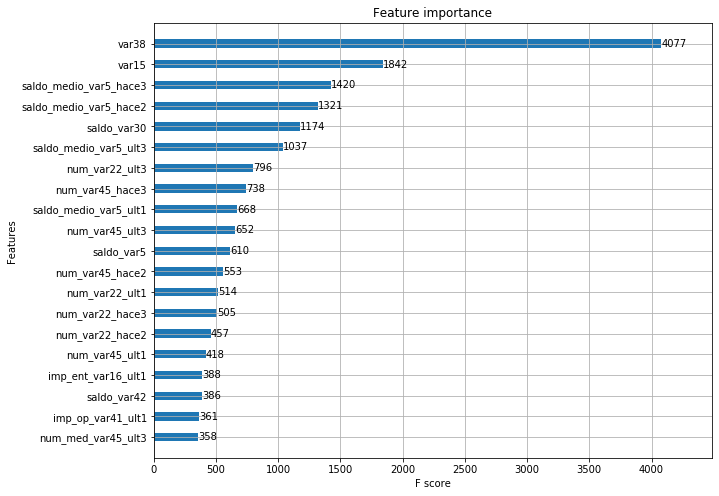

In [97]:
# 각 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [98]:
# LightGBM 학습 수행
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC : 0.8396


In [100]:
# GridSearchCV로 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves' : [32, 64], 
          'max_depth' : [128, 160], 
          'min_child_samples' : [60, 100], 
          'subsample' : [0.8, 1]
         }

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params ,cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
print("GridSearchCV 최적 파라미터 : ", gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average="macro")
print("ROC_AUC : {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

[27]	valid_0's auc: 0.872513	valid_0's binary_logloss: 0.124859	valid_1's auc: 0.839241	valid_1's binary_logloss: 0.139648
[28]	valid_0's auc: 0.873252	valid_0's binary_logloss: 0.124586	valid_1's auc: 0.839378	valid_1's binary_logloss: 0.139578
[29]	valid_0's auc: 0.87422	valid_0's binary_logloss: 0.124271	valid_1's auc: 0.839436	valid_1's binary_logloss: 0.139581
[30]	valid_0's auc: 0.874647	valid_0's binary_logloss: 0.124019	valid_1's auc: 0.83907	valid_1's binary_logloss: 0.13958
[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 

[36]	valid_0's auc: 0.878163	valid_0's binary_logloss: 0.122873	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.139395
[37]	valid_0's auc: 0.87856	valid_0's binary_logloss: 0.122649	valid_1's auc: 0.839051	valid_1's binary_logloss: 0.139443
[38]	valid_0's auc: 0.879102	valid_0's binary_logloss: 0.122415	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139378
[39]	valid_0's auc: 0.879978	valid_0's binary_logloss: 0.122126	valid_1's auc: 0.83945	valid_1's binary_logloss: 0.139391
[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc:

[10]	valid_0's auc: 0.85454	valid_0's binary_logloss: 0.134224	valid_1's auc: 0.838661	valid_1's binary_logloss: 0.144501
[11]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.133277	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.143737
[12]	valid_0's auc: 0.857283	valid_0's binary_logloss: 0.132431	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.143197
[13]	valid_0's auc: 0.858075	valid_0's binary_logloss: 0.131688	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.142633
[14]	valid_0's auc: 0.858945	valid_0's binary_logloss: 0.130983	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc: 0.861681	valid_0's binary_logloss: 0.129123	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.14114
[18]	valid_0's auc

[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc: 0.868599	valid_0's binary_logloss: 0.126372	valid_1's auc: 0.840299	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc: 0.870541	valid_0's binary_logloss: 0.125627	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.139708
[27]	valid_0's auc: 0.871191	valid_0's binary_logloss: 0.125319	valid_1's auc: 0.839924	valid_1's binary_logloss: 0.139651
[28]	valid_0's auc

[31]	valid_0's auc: 0.890934	valid_0's binary_logloss: 0.118306	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.141525
[32]	valid_0's auc: 0.891349	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.141529
[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.893197	valid_0's binary_logloss: 0.116998	valid_1's auc: 0.828503	valid_1's binary_logloss: 0.141781
[36]	valid_0's auc: 0.894242	valid_0's binary_logloss: 0.116658	valid_1's auc: 0.828875	valid_1's binary_logloss: 0.141779
Early stopping, best iteration is:
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logl

[14]	valid_0's auc: 0.872498	valid_0's binary_logloss: 0.127408	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.142262
[15]	valid_0's auc: 0.873589	valid_0's binary_logloss: 0.126603	valid_1's auc: 0.837256	valid_1's binary_logloss: 0.141869
[16]	valid_0's auc: 0.875441	valid_0's binary_logloss: 0.125783	valid_1's auc: 0.837912	valid_1's binary_logloss: 0.141528
[17]	valid_0's auc: 0.877154	valid_0's binary_logloss: 0.125036	valid_1's auc: 0.836689	valid_1's binary_logloss: 0.141384
[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's au

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc

[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 0.860793	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.140844
[18]	valid_0's auc: 0.861753	valid_0's binary_logloss: 0.12924	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.140599
[19]	valid_0's auc

[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc

[29]	valid_0's auc: 0.870369	valid_0's binary_logloss: 0.125647	valid_1's auc: 0.833494	valid_1's binary_logloss: 0.140215
[30]	valid_0's auc: 0.871105	valid_0's binary_logloss: 0.12536	valid_1's auc: 0.83327	valid_1's binary_logloss: 0.140214
[31]	valid_0's auc: 0.871414	valid_0's binary_logloss: 0.125161	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.140216
[32]	valid_0's auc: 0.872281	valid_0's binary_logloss: 0.12493	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.140148
[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0.874263	valid_0's binary_logloss: 0.124311	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.140067
[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 

[21]	valid_0's auc: 0.864129	valid_0's binary_logloss: 0.128163	valid_1's auc: 0.838539	valid_1's binary_logloss: 0.140401
[22]	valid_0's auc: 0.865066	valid_0's binary_logloss: 0.127776	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.140268
[23]	valid_0's auc: 0.866036	valid_0's binary_logloss: 0.127415	valid_1's auc: 0.838667	valid_1's binary_logloss: 0.140163
[24]	valid_0's auc: 0.866894	valid_0's binary_logloss: 0.127047	valid_1's auc: 0.838711	valid_1's binary_logloss: 0.139983
[25]	valid_0's auc: 0.867646	valid_0's binary_logloss: 0.126759	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.13986
[26]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.126486	valid_1's auc: 0.83866	valid_1's binary_logloss: 0.139795
[27]	valid_0's auc: 0.869533	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.838474	valid_1's binary_logloss: 0.13973
[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0

[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc: 0.874019	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.141515
[19]	valid_0's auc: 0.875288	valid_0's binary_logloss: 0.125352	valid_1's auc: 0.832788	valid_1's binary_logloss: 0.141499
[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's au

[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc

[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	valid_1's binary_logloss: 0.146527
[9]	valid_0's auc: 0.861391	valid_0's binary_logloss: 0.133585	valid_1's auc: 0.834625	valid_1's binary_logloss: 0.145543
[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0

[31]	valid_0's auc: 0.888842	valid_0's binary_logloss: 0.11924	valid_1's auc: 0.838469	valid_1's binary_logloss: 0.139125
[32]	valid_0's auc: 0.889829	valid_0's binary_logloss: 0.118853	valid_1's auc: 0.838631	valid_1's binary_logloss: 0.139121
[33]	valid_0's auc: 0.890569	valid_0's binary_logloss: 0.118502	valid_1's auc: 0.838736	valid_1's binary_logloss: 0.139065
[34]	valid_0's auc: 0.891418	valid_0's binary_logloss: 0.118158	valid_1's auc: 0.838692	valid_1's binary_logloss: 0.139051
[35]	valid_0's auc: 0.892153	valid_0's binary_logloss: 0.117818	valid_1's auc: 0.838839	valid_1's binary_logloss: 0.139022
[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc

[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.146015
[9]	valid_0's auc: 0.850276	valid_0's binary_logloss: 0.135274	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.145043
[10]	valid_0's auc: 0.852371	valid_0's binary_logloss: 0.134185	valid_1's auc: 0.839808	valid_1's binary_logloss: 0.144182
[11]	valid_0's auc: 0.853705	valid_0's binary_logloss: 0.133238	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.14345
[12]	valid_0's auc: 0.855304	valid_0's binary_logloss: 0.132409	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.142878
[13]	valid_0's auc: 0.856638	valid_0's binary_logloss: 0.131658	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.859432	valid_0's binary_logloss: 0.130373	valid_1's auc: 0.838236	valid_1's binary_logloss: 0.141582
[16]	valid_0's auc: 0.

[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 0.880571	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.13952
[39]	valid_0's auc: 0.88098	valid_0's binary_logloss: 0.12178	valid_1's auc: 0.838929	valid_1's binary_logloss: 0.139584
[40]	valid_0's auc: 0.881495	valid_0's binary_logloss: 0.121571	valid_1's auc: 0.838869	valid_1's binary_logloss: 0.139555
[41]	valid_0's auc: 0.881897	valid_0's binary_logloss: 0.121382	valid_1's auc: 0.838702	valid_1's binary_logloss: 0.139575
[42]	valid_0's auc: 0.882625	valid_0's binary_logloss: 0.121107	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139554
[43]	valid_0's auc: 0.882956	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.83914	valid_1's binary_logloss: 0.139546
[44]	valid_0's auc: 0.

[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 0.884201	valid_0's binary_logloss: 0.120532	valid_1's auc: 0.839839	valid_1's binary_logloss: 0.139368
[48]	valid_0's auc: 0.884428	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.839815	valid_1's binary_logloss: 0.139368
[49]	valid_0's auc: 0.884565	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.83995	valid_1's binary_logloss: 0.139355
[50]	valid_0's auc: 0.885102	valid_0's binary_logloss: 0.120013	valid_1's auc: 0.839807	valid_1's binary_logloss: 0.13936
[51]	valid_0's auc: 

[18]	valid_0's auc: 0.863324	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.838024	valid_1's binary_logloss: 0.140911
[19]	valid_0's auc: 0.864682	valid_0's binary_logloss: 0.128016	valid_1's auc: 0.838411	valid_1's binary_logloss: 0.140669
[20]	valid_0's auc: 0.865346	valid_0's binary_logloss: 0.127585	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.140498
[21]	valid_0's auc: 0.8665	valid_0's binary_logloss: 0.127103	valid_1's auc: 0.83851	valid_1's binary_logloss: 0.140294
[22]	valid_0's auc: 0.867889	valid_0's binary_logloss: 0.126657	valid_1's auc: 0.839074	valid_1's binary_logloss: 0.140136
[23]	valid_0's auc: 0.868624	valid_0's binary_logloss: 0.126281	valid_1's auc: 0.838987	valid_1's binary_logloss: 0.140028
[24]	valid_0's auc: 0.869855	valid_0's binary_logloss: 0.125882	valid_1's auc: 0.838802	valid_1's binary_logloss: 0.139975
[25]	valid_0's auc: 0.870426	valid_0's binary_logloss: 0.125541	valid_1's auc: 0.83912	valid_1's binary_logloss: 0.139815
[26]	valid_0's auc: 

[27]	valid_0's auc: 0.871191	valid_0's binary_logloss: 0.125319	valid_1's auc: 0.839924	valid_1's binary_logloss: 0.139651
[28]	valid_0's auc: 0.871788	valid_0's binary_logloss: 0.125064	valid_1's auc: 0.839647	valid_1's binary_logloss: 0.139574
[29]	valid_0's auc: 0.872714	valid_0's binary_logloss: 0.124726	valid_1's auc: 0.840154	valid_1's binary_logloss: 0.139481
[30]	valid_0's auc: 0.873746	valid_0's binary_logloss: 0.124416	valid_1's auc: 0.839602	valid_1's binary_logloss: 0.139497
[31]	valid_0's auc: 0.874715	valid_0's binary_logloss: 0.124154	valid_1's auc: 0.839072	valid_1's binary_logloss: 0.139568
[32]	valid_0's auc: 0.875774	valid_0's binary_logloss: 0.123879	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.139579
[33]	valid_0's auc: 0.876333	valid_0's binary_logloss: 0.123614	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.139492
[34]	valid_0's auc: 0.876841	valid_0's binary_logloss: 0.123372	valid_1's auc: 0.839078	valid_1's binary_logloss: 0.139459
[35]	valid_0's au

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc:

[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	valid_1's binary_logloss: 0.146178
[9]	valid_0's auc: 0.865562	valid_0's binary_logloss: 0.132428	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.145107
[10]	valid_0's auc: 0.867401	valid_0's binary_logloss: 0.131116	valid_1's auc: 0.836429	valid_1's binary_logloss: 0.144153
[11]	valid_0's auc: 0.868477	valid_0's binary_logloss: 0.129981	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.143351
[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0

[30]	valid_0's auc: 0.891023	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.83748	valid_1's binary_logloss: 0.140051
[31]	valid_0's auc: 0.891989	valid_0's binary_logloss: 0.117866	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.140006
[32]	valid_0's auc: 0.892909	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.140054
[33]	valid_0's auc: 0.893597	valid_0's binary_logloss: 0.117091	valid_1's auc: 0.836874	valid_1's binary_logloss: 0.140061
[34]	valid_0's auc: 0.894331	valid_0's binary_logloss: 0.116711	valid_1's auc: 0.836404	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.895331	valid_0's binary_logloss: 0.116306	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139942
[36]	valid_0's auc: 0.895954	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.139958
[37]	valid_0's auc: 0.896701	valid_0's binary_logloss: 0.115673	valid_1's auc: 0.837045	valid_1's binary_logloss: 0.139954
[38]	valid_0's auc

[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 0.860793	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.140844
[18]	valid_0's auc: 0.861753	valid_0's binary_logloss: 0.12924	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.140599
[19]	valid_0's auc: 0.86298	valid_0's binary_logloss: 0.12873	valid_1's auc: 0.837848	valid_1's binary_logloss: 0.14042
[20]	valid_0's auc: 0.863577	valid_0's binary_logloss: 0.128318	valid_1's auc: 0.837708	valid_1's binary_logloss: 0.140222
[21]	valid_0's auc: 0.864273	valid_0's binary_logloss: 0.127905	valid_1's auc: 0.838031	valid_1's binary_logloss: 0.140093
[22]	valid_0's auc: 0.865086	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.139982
[23]	valid_0's auc: 0.865788	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.139856
[24]	valid_0's auc: 

[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc: 0.880499	valid_0's binary_logloss: 0.121624	valid_1's auc: 0.840013	valid_1's binary_logloss: 0.139091
[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc: 0.881689	valid_0's binary_logloss: 0.121135	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139144
[52]	valid_0's au

[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc: 0.876802	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.139955
Early stopping, best iteration is:
[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_logloss: 0.1453
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logl

[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0.870611	valid_0's binary_logloss: 0.125574	valid_1's auc: 0.838527	valid_1's binary_logloss: 0.139586
[30]	valid_0's auc: 0.871288	valid_0's binary_logloss: 0.125351	valid_1's auc: 0.838578	valid_1's binary_logloss: 0.139533
[31]	valid_0's auc: 0.871941	valid_0's binary_logloss: 0.125092	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.139431
[32]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.124816	valid_1's auc: 0.839243	valid_1's binary_logloss: 0.139362
[33]	valid_0's auc: 0.873443	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139288
[34]	valid_0's auc: 0.874317	valid_0's binary_logloss: 0.124327	valid_1's auc: 0.839612	valid_1's binary_logloss: 0.139266
[35]	valid_0's auc: 0.875065	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.839746	valid_1's binary_logloss: 0.139241
[36]	valid_0's au

[19]	valid_0's auc: 0.875288	valid_0's binary_logloss: 0.125352	valid_1's auc: 0.832788	valid_1's binary_logloss: 0.141499
[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's a

[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc: 0.899904	valid_0's binary_logloss: 0.114381	valid_1's auc: 0.837191	valid_1's binary_logloss: 0.139562
[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_l

[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc: 0.874019	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.141515
[19]	valid_0's auc: 0.875288	valid_0's binary_logloss: 0.125352	valid_1's auc: 0.832788	valid_1's binary_logloss: 0.141499
[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's a

[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc: 0.899904	valid_0's binary_logloss: 0.114381	valid_1's auc: 0.837191	valid_1's binary_logloss: 0.139562
[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's a

[13]	valid_0's auc: 0.859429	valid_0's binary_logloss: 0.131427	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.141783
[14]	valid_0's auc: 0.86094	valid_0's binary_logloss: 0.130658	valid_1's auc: 0.843389	valid_1's binary_logloss: 0.141419
[15]	valid_0's auc: 0.862567	valid_0's binary_logloss: 0.129955	valid_1's auc: 0.84365	valid_1's binary_logloss: 0.141
[16]	valid_0's auc: 0.864351	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.84379	valid_1's binary_logloss: 0.140661
[17]	valid_0's auc: 0.865942	valid_0's binary_logloss: 0.128724	valid_1's auc: 0.843552	valid_1's binary_logloss: 0.140416
[18]	valid_0's auc: 0.867233	valid_0's binary_logloss: 0.128187	valid_1's auc: 0.843853	valid_1's binary_logloss: 0.140054
[19]	valid_0's auc: 0.868694	valid_0's binary_logloss: 0.127637	valid_1's auc: 0.844012	valid_1's binary_logloss: 0.139782
[20]	valid_0's auc: 0.86955	valid_0's binary_logloss: 0.127154	valid_1's auc: 0.843654	valid_1's binary_logloss: 0.139614
[21]	valid_0's auc: 0.8

In [101]:
# 해당 하이퍼 파라미터 LightGBM에 적용하고 다시 학습해 ROC-AUC 측정 결과 도출
lgbm_clf = LGBMClassifier(n_estimators=1000, max_depth = 128, min_child_samples = 100, num_leaves = 32, subsample = 0.8)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

## 분류 실습 - 캐글 신용카드 사기 검출  
* 레이블의 이름은 Class. 매우 불균형한 분포.  
* class가 0이면 정상적인 신용카드 트랜잭션 데이터, 1은 신용카드 사기 트랜잭션을 의미.  

### 언더 샘플링과 오버 샘플링의 이해  
* 지도 학습에서 극도로 불균형한 레이블값 분포로 인한 문제점을 해결하기 위해서는 적절한 학습 데이터를 확보하는 방안이 필요함. 대표적으로는 오버 샘플링(OverSampling)과 언더 샘플링(UnderSampling) 방법이 있음.  
* 오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아 주로 사용됨.  
<img src="https://t1.daumcdn.net/cfile/tistory/99317F3B5C09CCAE16">  
* 언더 샘플링  
    1) 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식.  
    2) 정상 레이블을 가진 데이터가 10,000건, 이상 레이블을 가진 데이터가 100건이 있으면 정상 레이블 데이터를 100건으로 줄여 버리는 방식.  
* 오버 샘플링  
    1) 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법.  
    2) 대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있음.  
    3) SMOTE는 적은 데이터 세트에 있는 개별 데이터들의 K 최근접 이웃을 찾아 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새로운 데이터들을 생성하는 방식.  
    4) SMOTE를 구현한 대표적인 파이썬 패키지는 imbalanced-learn임.  
<img src="https://t1.daumcdn.net/cfile/tistory/997D353B5C09CCAE0E">  

### 데이터 일차 가공 및 모델 학습/예측/평가

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [104]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

* Time 피처의 경우 데이터 생성 관련한 작업용 속성으로서 큰 의미가 없기 때문에 제거함.  
* Amount : 신용카드 트랜잭션 금액.  
* Class : 레이블, 0은 정상 1은 사기 트랜잭션.  
* 284,807개의 레코드에서 결측치는 없고 Class 피처 제외하고 모두 float형.

In [105]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [107]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [108]:
# 생성한 학습 데이터 세트와 테스트 데이터 세트의 레이블값 비율 확인
print("학습 데이터 레이블값 비율")
print(y_train.value_counts() / y_train.shape[0] * 100)
print("테스트 데이터 레이블값 비율")
print(y_test.value_counts() / y_test.shape[0] * 100)

학습 데이터 레이블값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [112]:
# 로지스틱 회귀와 LightGBM 기반의 모델이 데이터 가공을 수행하면서 예측 성능이 어떻게 변하는지 살펴보자.
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85282    13]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8738, 재현율 : 0.6081, F1 : 0.7171, AUC : 0.9709


In [114]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [116]:
# LightGBM
from lightgbm import LGBMClassifier

# boost_from_average : 초기 점수를 레이블의 평균으로 지정하는 파라미터. 레이블이 극도로 불균형할 경우에 True이면 재현율, ROC-AUC 성능을 매우 저하시킴.
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85289     6]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9492, 재현율 : 0.7568, F1 : 0.8421, AUC : 0.9797


## 데이터 분포도 변환 후 모델 학습/예측/평가

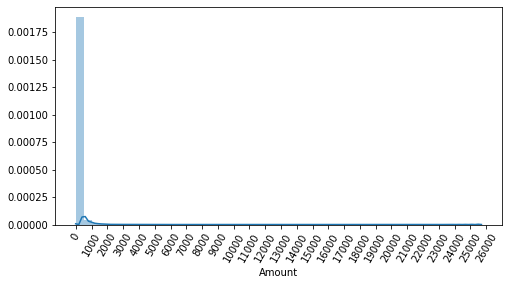

In [117]:
# Amount 피처의 분포도 확인하기
import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [125]:
# Amount를 표준 정규 분포 형태로 변환한 뒤 로지스틱 회귀 예측 성능 측정하기.
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DatFrame 맨 앞 칼럼으로 입력.
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [126]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능###")
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8654, 재현율 : 0.6081, F1 : 0.7143, AUC : 0.9707
### LightGBM 예측 성능###
오차 행렬
[[85289     6]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9492, 재현율 : 0.7568, F1 : 0.8421, AUC : 0.9773


In [130]:
# StandardScaler가 아닌 로그 변환 수행하기 - 로그 변환은 넘파이의 log1p() 함수 이용.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p()를 이용해 Amount를 로그 변환.
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [131]:
# Amount를 로그 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능###")
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8824, 재현율 : 0.6081, F1 : 0.7200, AUC : 0.9721
### LightGBM 예측 성능###
오차 행렬
[[85290     5]
 [   35   113]]
정확도 : 0.9995, 정밀도 : 0.9576, 재현율 : 0.7635, F1 : 0.8496, AUC : 0.9786


### 이상치 데이터 제거 후 모델 학습/예측/평가  
* 이상치 데이터(Outlier) : 전체 데이터의 패턴에서 벗어난 이상값을 가진 데이터, 아웃라이어라고도 불림.  
* 이상치를 찾는 방법 : IQR(Inter Quantile Range) 방식.  
* 사분위 : 전체 데이터를 값이 높은 순으로 정렬하고, 이를 1/4(25%)씩으로 구간을 분할하는 것.  
* IQR  
    1) 사분위 값의 편차를 이용하는 기법. 흔히 박스 플롯으로 시각화할 수 있음.  
    2) 25% 구간인 Q1 ~ 75% 구간인 Q3의 범위를 IQR이라 함.  
    <img src = "https://blogs.sap.com/wp-content/uploads/2019/03/Box-Plot.jpg">  
* IQR을 이용해 이상치 데이터를 검출하는 방식  
    1) 최댓값 : Q3 + IQR*1.5  
    2) 최솟값 : Q1 - IQR*1.5  
    3) 최댓값보다 큰값과 최솟값보다 작은 값은 이상치 데이터로 간주함.  

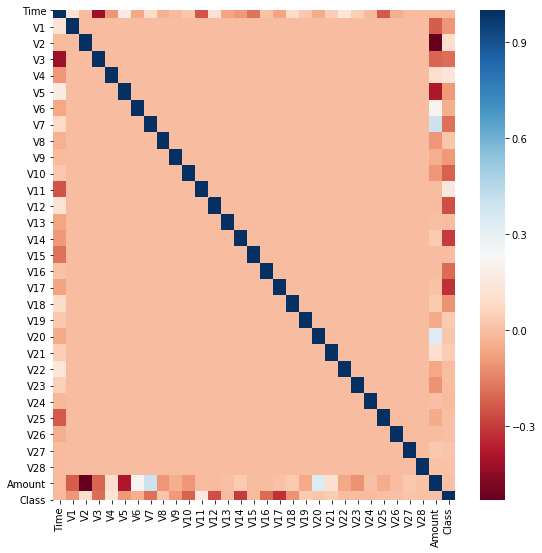

In [132]:
import seaborn as sns

plt.figure(figsize=(9, 9))
# DataFrame의 corr()을 이용해 각 피처별로 상관도 구하기
corr = card_df.corr()
# seaborn의 히트맵을 이용하여 시각화
sns.heatmap(corr, cmap='RdBu')

양의 상관관계가 높을수록 진한 파란색, 음의 상관관계가 높을수록 진한 빨간색.  
Class와 음의 상관관계가 큰 피처 : V14, V17

In [138]:
# V14에 대한 이상치를 찾아서 제거하기
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud(사기 신용카드)에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함.
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은값을 이상치 데이터로 설정하고 DataFrame index 반환.
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [139]:
# get_outlier() 함수를 이용해 V14 칼럼에서 이상치 데이터 찾아보기
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print("이상치 데이터 인덱스 : ", outlier_index)

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [140]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p()를 이용해 Amount를 로그 변환.
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print("### 로지스틱 회귀 예측 성능 ###")
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print("### LightGBM 예측 성능###")
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85282    13]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.8829, 재현율 : 0.6712, F1 : 0.7626, AUC : 0.9747
### LightGBM 예측 성능###
오차 행렬
[[85291     4]
 [   25   121]]
정확도 : 0.9997, 정밀도 : 0.9680, 재현율 : 0.8288, F1 : 0.8930, AUC : 0.9831


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가  
SMOTE를 적용할 때는 반드시 학습 데이터 세트에만 오버 샘플링 해야함.

In [144]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
# fit_sample() : 학습 피처/레이블 데이터를 증식
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print("SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ", X_train_over.shape, y_train_over.shape)
print("SMOTE 적용 전 레이블 값 분포 : \n", pd.Series(y_train).value_counts())
print("SMOTE 적용 후 레이블 값 분포 : \n", pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 전 레이블 값 분포 : 
 0    199020
1       342
Name: Class, dtype: int64
SMOTE 적용 후 레이블 값 분포 : 
 1    199020
0    199020
dtype: int64


In [145]:
# SMOTE 적용 후의 학습 데이터 세트로 로지스틱 회귀 모델 학습 후 성능 평가
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82932  2363]
 [   11   135]]
정확도 : 0.9722, 정밀도 : 0.0540, 재현율 : 0.9247, F1 : 0.1021, AUC : 0.9737


In [150]:
# 정밀도와 재현율 곡선 시각화
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축을 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold값 X축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()

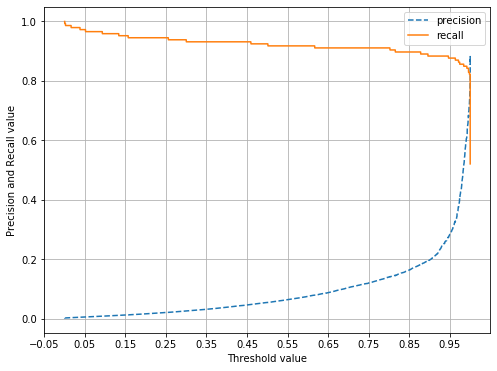

In [151]:
# 분류 결정 임곗값에 따른 정밀도와 재현율 곡선
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

분류 결정 임곗값을 조정하더라도 임곗값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없으므로 로지스틱 회귀 모델의 경우 SMOTE 적용 후 올바른 예측 모델이 생성되지 못함.

In [152]:
# LightGBM 모델을 SMOTE로 오버 샘플링된 데이터 세트로 학습/예측/평가 수행
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85286     9]
 [   22   124]]
정확도 : 0.9996, 정밀도 : 0.9323, 재현율 : 0.8493, F1 : 0.8889, AUC : 0.9789


SMOTE를 적용하기 전에 비해 정밀도는 낮아졌지만 재현율을 올라감. 이렇게 SMOTE를 적용하게 되면 재현율은 높아지고 정밀도는 높아지는 것이 일반적임.  
## 스태킹 앙상블  
* 스태킹(Stacking)은 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식임.  
* 개별 모델의 예측된 데이터 세트를 다시 기반으로 하여 학습하고 예측하는 방식을 메타 모델이라 함.  
* 핵심 : 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것.  

### 기본 스태킹 모델  

In [154]:
# 기본 스태킹 모델을 위스콘신 암 데이터 세트에 적용해 보기.
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [156]:
# 개별 모델 : KNN, 랜덤 포레스트, 결정 트리, 에이다부스트 / 이들 모델의 예측 결과를 합한 데이터 세트로 학습/예측하는 모델 : 로지스틱 회귀.
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

In [157]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [158]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print("KNN 정확도 : {0:.4f}".format(accuracy_score(y_test, knn_pred)))
print("RandomForest 정확도 : {0:.4f}".format(accuracy_score(y_test, rf_pred)))
print("DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy_score(y_test, dt_pred)))
print("adaBoost 정확도 : {0:.4f}".format(accuracy_score(y_test, ada_pred)))

KNN 정확도 : 0.9211
RandomForest 정확도 : 0.9649
DecisionTreeClassifier 정확도 : 0.9123
adaBoost 정확도 : 0.9561


In [159]:
# 각 개별 모델의 예측값을 최종 메타 모델인 로지스틱 회귀에서 사용하기 위한 학습 데이터로 만들기
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [160]:
# 예측 데이터로 생성된 데이터 세트를 기반으로 최종 메타 모델인 로지스틱 회귀를 학습하고 예측 정확도 측정
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print("최종 메타 모델의 예측 정확도 : {0:.4f}".format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.9737


### CV 세트 기반의 스태킹  
<img src="http://postfiles5.naver.net/MjAxOTA3MTdfMjQy/MDAxNTYzMzQ5ODcyMDUy.PmgHPqhpNM6dRUgh4RVtfuzqJKAfJhvchRZ0WeafOqAg.G4ZlayQjF2ZTe8HFhniOo_WkGkzdFgx4UKKAerkmKMIg.PNG.ckdgus1433/image.png?type=w773">  
* 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 대 교차 검증 기반으로 예측된 결과 데이터 세트를 이용함.  
* 앞에서 봤던 기본적인 스태킹은 최종 메타 모델을 학습할 때 학습 데이터가 아닌 테스트 데이터를 사용함. 이렇게 되면 과적합이 발생할 수 있음.  
* CV 세트 기반 스태킹은 각 개별 모델 학습 시 교차 검증을 이용하여 최종 학습 모델이 사용할 학습 데이터 세트와 테스트 데이터 세트를 구분해 과적합을 방지함.  
* 메타 모델의 학습 데이터는 각 개별 모델의 교차 학습 시 검증 데이터로 예측한 결괏값을 사용.  
* 메타 모델의 테스트 데이터는 각 개별 모델이 원본 테스트 세트를 이용하여 예측을 하는데 교차 학습 횟수만큼 반복하고 예측 결괏값들의 평균값을 사용함.  
* 메타 모델은 이렇게 만들어진 학습 데이터와 테스트 데이터로 학습/예측 후 원본 테스트 레이블로 성능 평가를 진행.  
<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbR6D6V%2FbtqACHzjtlj%2FirKMcoRlLVuP4qYMRR0XXK%2Fimg.jpg">  

In [163]:
# 스텝1 : 개별 모델이 메타 모델을 위한 학습용 데이터와 테스트 데이터 생성
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, " model 시작 ")
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print("\t 폴드 세트 : ", folder_counter, " 시작 ")
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    
    # train_fold_pred는 최종 메타 모델이 학습하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [164]:
# 여러 개의 분류 모델별로 stack_base_model() 함수를 수행.
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
	 폴드 세트 :  5  시작 
	 폴드 세트 :  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
	 폴드 세트 :  5  시작 
	 폴드 세트 :  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
	 폴드 세트 :  5  시작 
	 폴드 세트 :  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트 :  0  시작 
	 폴드 세트 :  1  시작 
	 폴드 세트 :  2  시작 
	 폴드 세트 :  3  시작 
	 폴드 세트 :  4  시작 
	 폴드 세트 :  5  시작 
	 폴드 세트 :  6  시작 


In [165]:
# 스텝 2 : 최종 메타 모델이 학습할 학습 데이터와 테스트 데이터 생성
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print("원본 학습 피처 데이터 Shape : ", X_train.shape, "원본 테스트 피처 Shape : ", X_test.shape)
print("스태킹 학습 피처 데이터 Shape : ", Stack_final_X_train.shape, 
      "스태킹 테스트 피처 데이터 Shape : ", Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape :  (455, 30) 원본 테스트 피처 Shape :  (114, 30)
스태킹 학습 피처 데이터 Shape :  (455, 4) 스태킹 테스트 피처 데이터 Shape :  (114, 4)


In [166]:
# 최종 메타 모델인 로지스틱 회귀를 이용하여 학습/예측/평가
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 메타 모델의 예측 정확도 : {0:.4f}".format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도 : 0.9737


스태킹을 이루는 모델은 최적으로 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적임.  
스태킹 모델은 분류뿐만 아니라 회귀에도 적용 가능함.